In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

Object detection

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 64.1MB/s]



image 1/1 /content/peeple.jpg: 480x640 5 persons, 1 bench, 3 chairs, 2 potted plants, 435.0ms
Speed: 16.9ms preprocess, 435.0ms inference, 38.4ms postprocess per image at shape (1, 3, 480, 640)


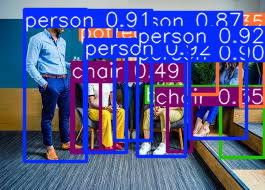

In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

# Perform object detection on an image
results = model("peeple.jpg")
results[0].show()

Video in object detection

In [3]:
results = model("people_vd.mp4", save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/188) /content/people_vd.mp4: 384x640 9 persons, 1 car, 3 traffic lights, 1 tie, 1 suitcase, 183.8ms
video 1/1 (frame 2/188) /content/people_vd.mp4: 384x640 9 persons, 1 car, 3 traffic lights, 1 tie, 1 suitcase, 167.4ms
video 1/1 (frame 3/188) /content/people_vd.mp4: 384x640 9 persons, 1 car, 3 traffic lights, 1 tie, 2 suitcases, 157.9ms
video 1/1 (frame 4/188) /content/people_vd.mp4: 384x640 9 persons, 1 car, 3 traffic lights, 1 tie,

segmentation


image 1/1 /content/peeple.jpg: 480x640 5 persons, 2 benchs, 1 chair, 2 potted plants, 258.6ms
Speed: 3.7ms preprocess, 258.6ms inference, 35.2ms postprocess per image at shape (1, 3, 480, 640)


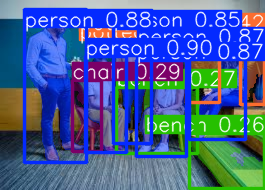

In [5]:
segment_model = YOLO("yolo11n-seg.pt")
result = segment_model("peeple.jpg")
result[0].show()

Pose Estimation

100%|██████████| 5.97M/5.97M [00:00<00:00, 68.5MB/s]



image 1/1 /content/peeple.jpg: 480x640 5 persons, 189.9ms
Speed: 9.6ms preprocess, 189.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


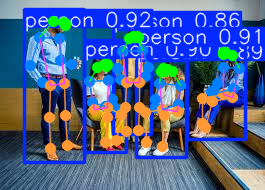

In [6]:
pos_est_model = YOLO("yolo11n-pose.pt")

# Perform object detection on an image
results = pos_est_model("peeple.jpg")
results[0].show()

Image Classification


image 1/1 /content/cat_demo.jpg: 224x224 Egyptian_cat 0.55, tabby 0.16, tiger_cat 0.14, Persian_cat 0.04, kit_fox 0.03, 53.6ms
Speed: 23.0ms preprocess, 53.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


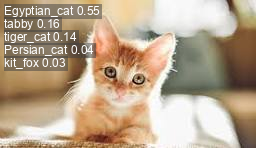

In [8]:


# Load a model
cls_model = YOLO("yolo11n-cls.pt")

# Perform object detection on an image
results = cls_model("cat_demo.jpg")
results[0].show()

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-obb.pt")

# Perform object detection on an image
results = model("vid1.mp4", save=True)
#results[0].save()